In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date
import seaborn as sns

In [2]:
evds=evdsAPI('dsIC3fiGlu')


In [3]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4591,07-09-2023,26.8183
4592,08-09-2023,26.8531
4593,11-09-2023,26.8570
4594,12-09-2023,26.8897


In [4]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd=usd.head(212)
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [5]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84


In [6]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]
enf


,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84


c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

Text(0.5, 1.0, "Turkey's CPI")

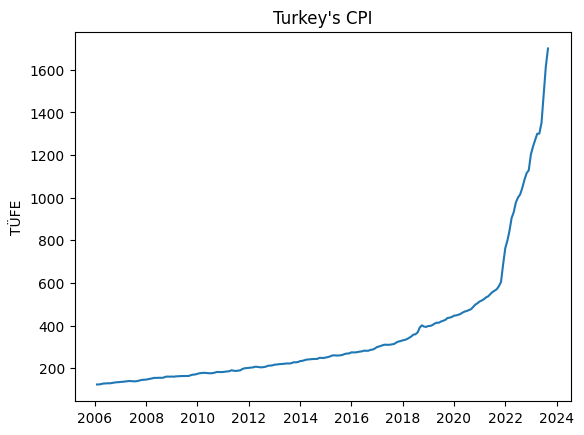

In [7]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)


date_index = pd.date_range(start='2023-09-01', periods=1)

# Veri oluştur
enfnew = {'TÜFE': [1700]}

# DataFrame oluştur
enfnew = pd.DataFrame(enfnew, index=date_index)
enf=pd.concat([enf,enfnew],axis=0)
enf=enf.set_index(dates)
  


sns.lineplot(x=dates,y=enf["TÜFE"])
plt.title("Turkey's CPI")



In [8]:
enf=enf.set_index(dates)
del enf["Tarih"]

In [9]:
usd=pd.DataFrame(usd)
usd.columns=["USD/TL"]

usd["USD/TL"]=usd["USD/TL"].astype(float)
usd

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [10]:
dates= pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
usd=usd.set_index(dates)
usd

,USD/TL
2006-02-01,1.326535
2006-03-01,1.335139
2006-04-01,1.337345
2006-05-01,1.420659
2006-06-01,1.600536
...,...
2023-05-01,19.719514
2023-06-01,23.106042
2023-07-01,26.470338
2023-08-01,26.999127


In [11]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202529e+10


In [12]:
#Cleaning the data

money=pd.DataFrame(money)
money.columns=["Tarih","Para Arzi"]
money["Para Arzi"]=money["Para Arzi"].astype(float)
money


,Tarih,Para Arzi
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202529e+10


In [13]:
dates= pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
money=money.set_index(dates)
money["Para Arzi"]=money["Para Arzi"]/1e+08
money

del money["Tarih"]

money


,Para Arzi
2006-02-01,2.423895
2006-03-01,2.494857
2006-04-01,2.521919
2006-05-01,2.751947
2006-06-01,2.791388
...,...
2023-05-01,94.093167
2023-06-01,108.345324
2023-07-01,114.784753
2023-08-01,120.252858


In [14]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4585,30-08-2023,86.62
4586,31-08-2023,87.29
4587,01-09-2023,89.98
4588,04-09-2023,90.42


In [15]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle
brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [16]:

brent.columns=["Brent"]
date_index = pd.date_range(start='2023-09-30', periods=1)

brent
  



,Brent
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [17]:

dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)


brent = brent.set_index(dates)
brent

,Brent
2006-02-01,60.210000
2006-03-01,62.064783
2006-04-01,70.260000
2006-05-01,69.776957
2006-06-01,68.555909
...,...
2023-05-01,75.466000
2023-06-01,74.839091
2023-07-01,80.108095
2023-08-01,86.147727


In [18]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09
210,2023-8,9.923806e+09


In [19]:

kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
del kredi["Tarih"]
kredi

,Kredi
0,1.381847
1,1.481222
2,1.527510
3,1.664881
4,1.740395
...,...
207,88.043441
208,95.646045
209,98.468952
210,99.238055


In [20]:
dates= pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

kredi = kredi.set_index(dates)
kredi

,Kredi
2006-02-01,1.381847
2006-03-01,1.481222
2006-04-01,1.527510
2006-05-01,1.664881
2006-06-01,1.740395
...,...
2023-05-01,88.043441
2023-06-01,95.646045
2023-07-01,98.468952
2023-08-01,99.238055


In [21]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
mfaiz['Tarih'] = pd.to_datetime(mfaiz['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
mfaiz.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
mfaiz = mfaiz["TP_TRY_MT02"].resample('M').mean()

# Sonucu görüntüle
mfaiz=pd.DataFrame(mfaiz)
mfaiz.columns=["Mevduat Faizi"]
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
mfaiz=mfaiz.set_index(dates)
mfaiz

,Mevduat Faizi
2006-02-01,15.7600
2006-03-01,15.3300
2006-04-01,15.1750
2006-05-01,14.9250
2006-06-01,15.5840
...,...
2023-05-01,31.4625
2023-06-01,39.5920
2023-07-01,33.1250
2023-08-01,29.4125


In [22]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
kfaiz['Tarih'] = pd.to_datetime(kfaiz['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
kfaiz.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
kfaiz = kfaiz["TP_KTFTUK"].resample('M').mean()

# Sonucu görüntüle
kfaiz=pd.DataFrame(kfaiz)
kfaiz.columns=["Kredi Faizi"]
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
kfaiz=kfaiz.set_index(dates)
kfaiz

,Kredi Faizi
2006-02-01,17.2975
2006-03-01,17.0080
2006-04-01,16.2075
2006-05-01,16.3000
2006-06-01,19.6700
...,...
2023-05-01,32.0225
2023-06-01,38.5600
2023-07-01,45.8250
2023-08-01,45.7650


In [173]:

data=pd.DataFrame()
dates=pd.date_range(start='2006-02-01', periods=211, freq='M')

# Veriyi bir veri çerçevesine yerleştirme


data["Döviz Kuru"]=usd["USD/TL"].shift(1)
data["Para Arzı"]=money["Para Arzi"]
data["Petrol"]=brent["Brent"]
data["Kredi Hacmi"]=kredi["Kredi"]
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["TÜFE"]=enf["TÜFE"]
data=data.head(211)
data.set_index(dates, inplace=True)
data.dropna(inplace=True)

data=data.head(210)
data




,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,Kredi Faizi,TÜFE
2006-03-31,1.326535,2.494857,62.064783,1.481222,17.0080,124.18
2006-04-30,1.335139,2.521919,70.260000,1.527510,16.2075,125.84
2006-05-31,1.337345,2.751947,69.776957,1.664881,16.3000,128.20
2006-06-30,1.420659,2.791388,68.555909,1.740395,19.6700,128.63
2006-07-31,1.600536,2.711670,73.674286,1.731811,25.2825,129.72
...,...,...,...,...,...,...
2023-04-30,19.003478,95.059993,84.739474,85.721139,29.2275,1300.04
2023-05-31,19.337032,94.093167,75.466000,88.043441,32.0225,1300.60
2023-06-30,19.719514,108.345324,74.839091,95.646045,38.5600,1351.59
2023-07-31,23.106042,114.784753,80.108095,98.468952,45.8250,1479.84


In [174]:
from statsmodels.tsa.api import VAR
import pandas as pd

# Assuming you have your 'data' DataFrame containing your time series data

# Set the maximum lag order
max_lag = 1

# Fit a VAR model with the specified maximum lag order
model = VAR(data)
model_fitted = model.fit(maxlags=max_lag)

def dynamic_forecast(model_fitted, start_date, steps):
    """
    Perform dynamic forecasting using a fitted VAR model.
    
    Parameters:
    - model_fitted: A fitted VAR model.
    - start_date: The starting date for dynamic forecasting.
    - steps: Number of steps to forecast.
    
    Returns:
    - A DataFrame with dynamic forecasts.
    """
    
    # Initialize the forecast dataframe
    forecast_df = pd.DataFrame(index=data.index, columns=data.columns)
    
    # Ensure that you have enough historical data for the VAR model
    start_date -= pd.DateOffset(months=max_lag - 1)
    
    # For each step in the forecast horizon
    for step in range(steps):
        # Forecast one step ahead
        last_obs = data.values[-max_lag + step:]
        forecast = model_fitted.forecast(last_obs, steps=1)
        
        # Set the forecasted values for the current step
        forecast_df.loc[start_date] = forecast[0]
        
        # Use the forecasted values for the next step prediction
        data.loc[start_date] = forecast[0]
        
        # Increment the start_date
        start_date += pd.DateOffset(months=1)
    
    return forecast_df.dropna()

# Apply the dynamic forecast function
start_date = pd.Timestamp('2023-09-01')
forecast_dynamic = dynamic_forecast(model_fitted, start_date, steps=12)
forecast_dynamic


C:\Users\Bora\AppData\Local\Temp\ipykernel_5924\925587122.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df.loc[start_date] = forecast[0]


,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,Kredi Faizi,TÜFE
2023-09-01,27.697303,126.258303,85.545865,103.433892,45.519578,1691.485417
2023-10-01,28.954236,132.623043,85.038967,107.954161,45.147153,1771.738320
2023-11-01,30.262067,139.375475,84.677463,112.811595,44.713745,1855.685098
2023-12-01,31.637643,146.541623,84.503334,118.019135,44.269150,1943.877431
2024-01-01,33.094577,154.146076,84.550683,123.590283,43.850267,2036.815003
2024-02-01,34.643989,162.212764,84.846484,129.539373,43.483901,2134.957387
2024-03-01,36.295123,170.765590,85.411446,135.881769,43.189110,2238.734868
2024-04-01,38.055876,179.828942,86.260893,142.634018,42.979123,2348.558108
2024-05-01,39.933228,189.428108,87.405634,149.813963,42.862886,2464.826657
2024-06-01,41.933588,199.589610,88.852788,157.440836,42.846286,2587.936338


In [178]:
dff=pd.concat([enf["TÜFE"].head(211),forecast_dynamic.iloc[0:,5]],axis=0)
dff=pd.DataFrame(dff)
dff.columns=["CPI"]
dff


,CPI
2006-02-01,123.840000
2006-03-01,124.180000
2006-04-01,125.840000
2006-05-01,128.200000
2006-06-01,128.630000
...,...
2024-04-01,2348.558108
2024-05-01,2464.826657
2024-06-01,2587.936338
2024-07-01,2718.285623


In [180]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor
# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
dff['onceki_yil_tufe'] = dff['CPI'].shift(12)
# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
dff['yillik_enflasyon_orani'] = ((dff['CPI'] / dff['onceki_yil_tufe']) - 1) * 100
# NaN değerleri (ilk 12 ay) veriden çıkarın
dff.dropna(inplace=True)


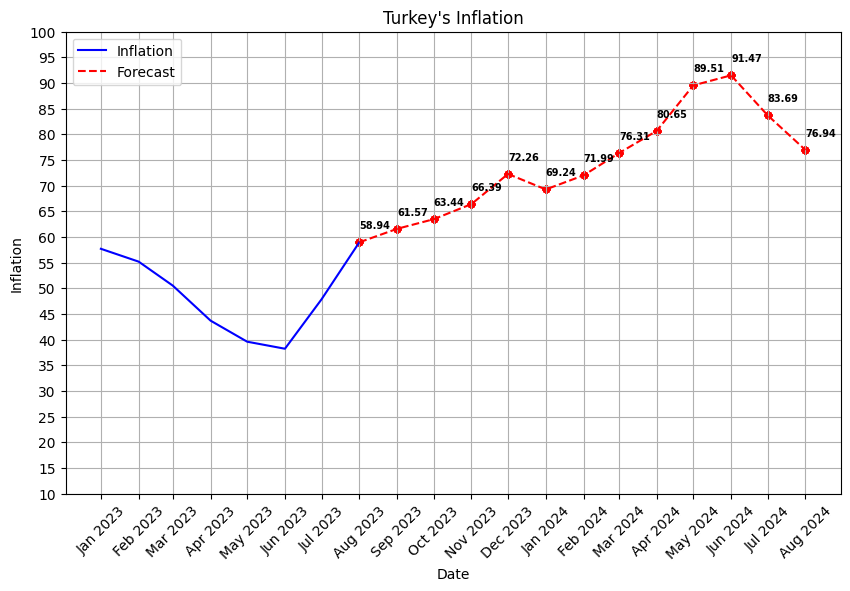

In [181]:
dates=pd.date_range('2008-02-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)

# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(dff.iloc[191:199]["yillik_enflasyon_orani"], label='Inflation', color='blue')
plt.plot(dff.iloc[198:]["yillik_enflasyon_orani"],label='Forecast', color='red',linestyle="--")





plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dff.iloc[191:].index, [t.strftime('%b %Y') for t in dff.iloc[191:].index], rotation=45)

y_max = 100
y_min = 10
y_interval = 0.5
y_ticks = [y_min]
while y_ticks[-1] < y_max:
    y_ticks.append(y_ticks[-1] + 5)

son_dort_veri=dff["yillik_enflasyon_orani"].iloc[198:]

# Y ekseni etiketlerini ayarlama
for i, v in enumerate(son_dort_veri):
    plt.annotate(f'{v:.2f}', (son_dort_veri.index[i], v), xytext=(0, 10), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri.index,son_dort_veri,color='red',s=20)
plt.yticks(y_ticks)
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()
